In [1]:
### 🛑 Import des bibliothèques
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
import scipy as sp
from scipy import fft, signal
import time

<span style="font-size: x-large;">⚠️</span> Prenez le temps de lire l'intégralité du notebook. Les longues parties de texte sont vraiment nécessaires pour acquérir le niveau de compréhension minimal pour pouvoir exploiter en pratique la TFD, et ne pas tomber dans ses nombreux écueils.

# Les vrais galères du traitement numérique du signal
Où on se rend compte qu'on pensait avoir tout compris, et qu'en fait, non...

Dans l'exercice précédent, vous avez pu prendre en main les notions de base à maîtriser lorsqu'on veut calculer et manipuler une TFD, à savoir :
* La définition d'un vecteur de temps discret (en utilisant `np.arange` ou `np.linspace`). Cette étape est loin d'être un détail, puisqu'en définissant l'échelle de temps, on définit la période d'échantillonnage du signal, et donc la fréquence maximale du signal (tout ceci devrait devenir clair après le cours sur la conversion analogique-numérique).
* La définition d'un vecteur de fréquences discrètes, pour calibrer l'échelle en fréquence de la transformée de Fourier du signal. `sp.fft.fftfreq` le fait pour nous, à partir du moment où on lui donne les bons arguments.
* Par défaut, aussi bien `sp.fft.fftfreq` que `sp.fft.fft` renvoient les fréquences positives sur la première moitié du vecteur qu'ils retournent, et les fréquences négatives sur la deuxième moitié. L'utilisation de `sp.fft.fftshift` permet de permuter les 2 moitiés, pour ramener les fréquences négatives au début, et donc la fréquence nulle au centre des vecteurs.

La cellule ci-dessous rappelle justement en version code les grandes étapes du calcul (et de la visualisation) de la TFD d'un signal.

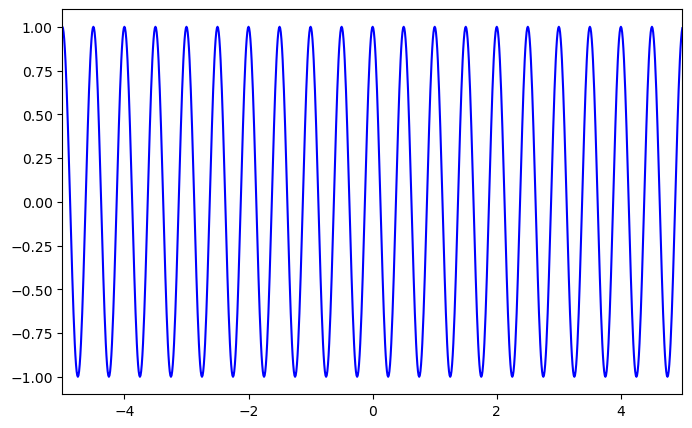

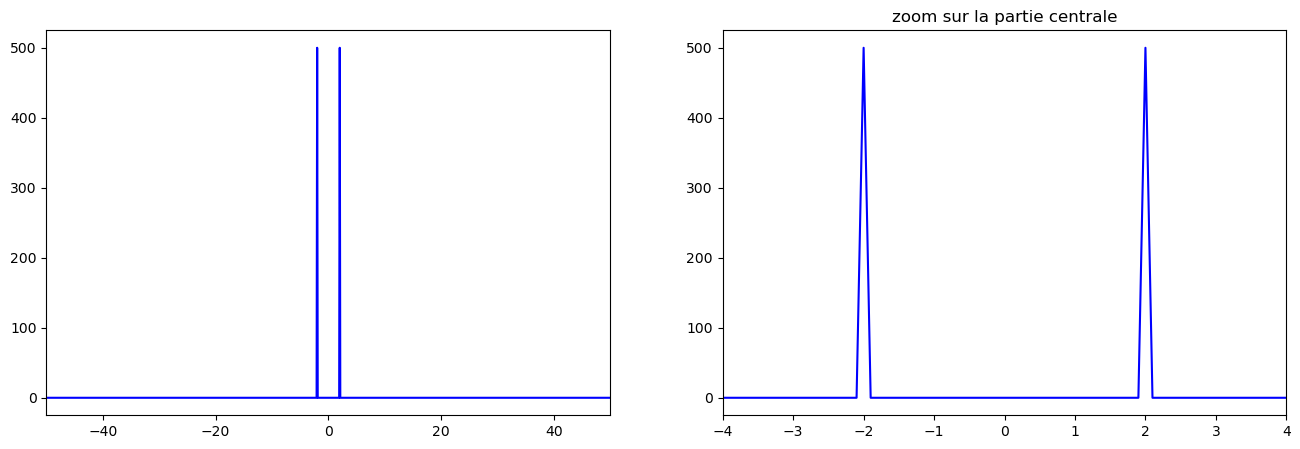

In [2]:
# 🛑 Rappels de la base de la TFD
Te = 0.01 # période d'échantillonnage
Fe = 1/Te # fréquence d'échantillonnage
t = np.arange(-5,5,Te) # vecteur de temps discret de -5 (inclus) à 5 (exclu) avec pas de temps Te

T = 0.5 # période propre du signal cosinus
F = 1/T # fréquence propre du signal cosinus
x = np.cos(2*np.pi*t/T)

nu = sp.fft.fftfreq(x.size,d=Te) # fréquences discrètes
nu = sp.fft.fftshift(nu) # Recentrage de la fréquence nulle
X = sp.fft.fftshift(sp.fft.fft(x)) # TFD + fftshift

# Tracé de la représentation temporelle
plt.figure(figsize=(8,5))
plt.plot(t,x,'b')
plt.xlim(t.min(),t.max())
plt.show()

# Tracé de la représentation fréquentielle + zoom
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(nu, np.abs(X),'b')
plt.xlim(nu.min(),nu.max())
plt.subplot(122)
plt.plot(nu, np.abs(X),'b')
plt.title('zoom sur la partie centrale')
plt.xlim(-2/T,2/T) # Restriction de l'axe des fréquences
plt.show()

## Sur-échantillonnage de la TFD

Par défaut, la TFD d'un signal $x$ de longueur $N$ se calcule sur $N$ points (donc sur $N$ fréquences discrètes, donc un pas en fréquence de $\frac{f_e}{N}$ puisque les fréquences discrètes s'étalent de $-\frac{f_e}{2}$ à $\frac{f_e}{2}$).

Cependant, il est possible de faire le calcul sur un plus grand nombre $M > N$ de points (on appelle ça le <b>sur-échantillonnage de la TFD</b>). Dans ce cas, on a évidemment $M$ fréquences discrètes, et le pas en fréquence passe à $\frac{f_e}{M} < \frac{f_e}{N}$. Les fréquences discrètes sont plus rapprochées : la résolution de la TFD augmente. Alors, pourquoi s'en priver ?

Pour cela, un petit coup d'oeil à la documentation de [`sp.fft.fftfreq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html) s'impose de nouveau : la résolution temporelle $T_e$ du signal n'ayant pas changé, le deuxième argument `d` de `sp.fft.fftfreq` ne devrait pas changer non plus ! C'est donc le premier argument `n`, c'est-à-dire le nombre de points de calcul des fréquences discrètes qu'il va falloir modifier !

### 🛠️ 🚧 👷  À vous de jouer !

Dans un premier temps, calculez les fréquences discrètes sur 2 fois plus de points que la longueur du signal $x$, et vérifiez, en calculant la différence entre deux fréquences discrètes successives, que la résolution fréquentielle a bien changé comme prévu.

In [15]:
r = 2 # facteur de sur-échantillonnage des fréquences discrètes
nu_r = sp.fft.fftshift(sp.fft.fftfreq(x.size*r,0.001)) # FIXME

In [ ]:
delta_nu = ??? # FIXME résolution fréquentielle sans sur-échantillonnage
print('pas en fréquence sans sur-échantillonnage : %1.2f'%delta_nu)
delta_nu_r = ??? # FIXME résolution fréquentielle avec sur-échantillonnage
print('pas en fréquence avec sur-échantillonnage : %1.2f'%delta_nu_r)

Maintenant que la résolution fréquentielle a été multipliée par 2, il convient de calculer la TFD sur 2 fois plus de points également (évidemment, on veut obtenir une TFD de même taille que le vecteur de fréquences discrètes...). Et ça tombe bien, car [`sp.fft.fft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html) donne l'option de choisir le nombre de points de calcul de la TFD (pris par défaut comme étant la longueur du signal $x$, ce qui était le cas d'usage jusqu'à présent). Pour cela, il suffit de modifier son argument optionnel `n`.

### 🛠️ 🚧 👷  À vous de jouer !

Calculez la TFD du signal $x$ sur 2 fois plus de points que la longueur de $x$ (c'est-à-dire sur le même nombre de points que le vecteur de fréquences discrètes que vous venez de calculer à la question précédente), puis affichez le spectre "sur-échantillonné". Que remarquez-vous ? <br>
Même question pour un facteur de sur-échantillonnage de 5 ? (pensez bien à recalculer aussi le vecteur de fréquences discrètes pour $r=5$...)

In [16]:
X_r = sp.fft.fftshift(sp.fft.fft(r*x)) # FIXME

ValueError: x and y must have same first dimension, but have shapes (2000,) and (1000,)

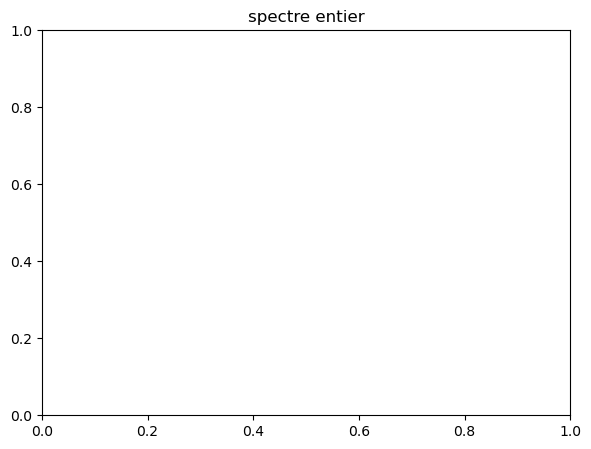

In [17]:
# 🛑 Tracé du spectre + zoom
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('spectre entier')
plt.plot(nu_r,np.abs(X_r),'b')
plt.xlim(nu_r.min(),nu_r.max())
plt.subplot(122)
plt.title('zoom sur portion centrale du spectre')
plt.plot(nu_r,np.abs(X_r),'b')
plt.xlim(-2/T,2/T)
plt.show()

Par rapport au cas sans sur-échantillonnage, on remarque que ❓❓❓

## Influence du nombre de périodes sur la fenêtre d'observation

Jusqu'à présent, la période propre $T$ du signal $\displaystyle x(t) = \cos\left( \frac{2 \pi}{T} t\right)$ était définie de manière à ce qu'on observe un nombre entier de périodes de $x$ sur la durée de la fenêtre d'observation (donc pour $t$ allant de $-5$ à $5$). Mais que se passe t-il si le nombre de périodes qu'on observe n'est pas entier ?

### 🛠️ 🚧 👷  À vous de jouer !

Reprenez le signal cosinus, mais définissez cette fois-ci sa période $T$ pour ne pas en avoir un nombre entier sur la durée d'observation du signal (par exemple $T = 3$, $T = \frac{\pi}{2}$, etc). Calculez et affichez sa TFD, d'abord sans sur-échantillonnage, puis avec. Que remarquez-vous ?

In [ ]:
A = 1 # Amplitude
T = ??? # FIXME période propre du signal
F = 1/T # Fréquence propre
x = A*np.cos(2*pi*t/T)

plt.figure(figsize=(8,5))
plt.title('cosinus de période propre T = %1.2f (%1.2f cycles par unité de temps)'%(T,F))
plt.plot(t,x,'b')
plt.xlim(t.min(),t.max())
plt.show()

In [ ]:
r = ??? # FIXME facteur de sur-échantillonnage
nu = sp.fft.fftshift(sp.fft.fftfreq(???)) # FIXME fréquences discrètes
X = sp.fft.fftshift(sp.fft.fft(???)) # FIXME

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('spectre entier')
plt.plot(nu,???,'b') # FIXME
plt.xlim(nu.min(),nu.max())
plt.subplot(122)
plt.title('zoom sur portion centrale du spectre')
plt.plot(nu,???,'b') # FIXME
plt.xlim(-2/T,2/T)
plt.show()

Lorsque le nombre de périodes du signal $x$ n'est pas un nombre entier sur la fenêtre d'observation, on remarque dans le spectre calculé par la DFT que ❓❓❓

Les deux observations précédentes (dans le cas d'un nombre entier de périodes avec sur-échantillonnage, et dans le cas d'un nombre non entier de périodes) sont causées par le même phénomène : un signal numérique $x$ est forcément de longueur finie (disons $N$). Ce signal numérique de longueur $N$ peut être modélisé par un signal "théorique" de longueur infinie $x_\infty$ multiplié par une porte $\Pi_N$ de longueur égale à la fenêtre d'observation de $x$ : 

$$x(t) = x_\infty(t) \times \Pi_N(t)$$

Ainsi, calculer le spectre d'un cosinus de longueur finie et de fréquence propre $\nu_0$ (ce qui est fait en pratique par la DFT) est mathématiquement équivalent à calculer le spectre d'un cosinus infini multiplié par une porte de largeur N.

### 🛠️ 🚧 👷  À vous de jouer !

Sachant que :
* le signal $x$ est observé sur une fenêtre de longueur $N$ : $x(t) = x_\infty(t) \times \Pi_N(t)$
* si $x_\infty(t) = \cos\left( 2 \pi \nu_0 t\right)$, alors $\mathcal{F}\big(x_\infty(t)\big) = X_\infty(\nu) = \frac12 \big( \delta(\nu-\nu_0) + \delta(\nu + \nu_0) \big)$
* $\mathcal{F}\big(\Pi_N(t)\big) = N \text{sinc}(\pi\nu N)$
* le théorème de Plancherel stipule que $\mathcal{F}\big(x(t)\times y(t)\big) = \mathcal{F}\big(x(t)\big) \ast  \mathcal{F}\big(y(t)\big)$

Alors que vaut (analytiquement) $\mathcal{F}\big(x(t)\big)$ ? Pouvez-vous en déduire ce qui cause l'apparition des sinus cardinaux dans le cas du sur-échantillonnage ou lorsque le nombre de périodes observées n'est pas un entier ?

D'après le théorème de Plancherel, $\mathcal{F}\big(x(t)\big) = $ ❓❓❓

L'apparition des sinus cardinaux à la place des Dirac dans le spectre de $x$ dans le cas du sur-échantillonnage ou lorsque le nombre de périodes observées n'est pas un entier provient donc de ❓❓❓

## Analyse spectrale d'une mixture de signaux trigonométriques

### 🛠️ 🚧 👷  À vous de jouer !

Définissez maintenant un nouveau signal $x$ comme étant la somme de deux cosinus et d'un sinus de différentes amplitudes et fréquences propres : $x(t) = A_1 \cos(2 \pi \nu_1 t) + A_2 \cos(2 \pi \nu_2 t) + A_3 \sin(2 \pi \nu_3 t)$. Libre à vous de choisir les valeurs de $A_1$, $A_2$ et $A_3$ ainsi que les fréquences propres $\nu_1$ $\nu_2$ et $\nu_3$, du moment que ces dernières vous permettent d'avoir un nombre entier de périodes sur la durée de définition du signal (c'est-à-dire 10 secondes). En théorie, quelle devrait être l'expression de la transformée de Fourier de $x$ ?

In [ ]:
A1,A2,A3 = ??? # FIXME
nu1,nu2,nu3 = ??? # FIXME
x = ??? # FIXME

In [ ]:
# 🛑 Tracé du signal
plt.figure(figsize=(8,5))
plt.title("Somme de deux cosinus et d'un sinus")
plt.plot(t,x,'b')
plt.xlim(t.min(),t.max())
plt.show()

En théorie, la transformée de Fourier de $x$ devrait être $X(\nu) = $❓❓❓

### 🛠️ 🚧 👷  À vous de jouer !

Calculez la transformée de Fourier du signal $x$ que vous avez défini à la question précédente (avec ou sans sur-échantillonnage). Visualisez la partie réelle (avec [`np.real`](https://numpy.org/doc/stable/reference/generated/numpy.real.html)), la partie imaginaire (avec [`np.imag`](https://numpy.org/doc/stable/reference/generated/numpy.imag.html)) et le spectre de cette TFD. Est-ce conforme à ce que vous attendiez ?

In [ ]:
r = ??? # FIXME Facteur de sur-échantillonnage
nu = sp.fft.fftshift(sp.fft.fftfreq(???)) # FIXME
X = sp.fft.fftshift(sp.fft.fft(???)) # FIXME

In [ ]:
numax = max(nu1,nu2,nu3)

plt.figure(figsize=(15,15))
plt.subplot(321)
plt.title('spectre entier')
plt.plot(nu,???,'b') # FIXME Affichage du spectre
plt.xlim(nu.min(),nu.max())
# --------------
plt.subplot(322)
plt.title('zoom sur portion centrale du spectre')
plt.plot(nu,???,'b') # FIXME Affichage du spectre
plt.xlim(-2*numax,2*numax)
# --------------
plt.subplot(323)
plt.title('partie réelle de la TFD')
plt.plot(nu,???,'b') # FIXME Affichage de la partie réelle
plt.xlim(nu.min(),nu.max())
# --------------
plt.subplot(324)
plt.title('zoom sur portion centrale de la partie réelle')
plt.plot(nu,???,'b') # FIXME Affichage de la partie réelle
plt.xlim(-2*numax,2*numax)
# --------------
plt.subplot(325)
plt.title('partie imaginaire de la TFD')
plt.plot(nu,???,'b') # FIXME Affichage de la partie imaginaire
plt.xlim(nu.min(),nu.max())
# --------------
plt.subplot(326)
plt.title('zoom sur portion centrale de la partie imaginaire')
plt.plot(nu,???,'b') # FIXME Affichage de la partie imaginaire
plt.xlim(-2*numax,2*numax)
plt.show()

# Bravo !  🎉🥳🍻
Bon boulot ! Vous en avez fini avec ce TP !